# Air Quality Dataset Analysis

In [143]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Constants
On the oficial dataset description (check pdf in data directory), variables containing average values are considered categorical, and similar problem happens with variables considered as Integer. Taking this into account all variables (apart from the date), are considered as continuous.

In [144]:
COLUMNS_NUMERICAL = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Loading the dataset

In [145]:
data = pd.read_csv("./data/AirQualityUCI.csv", sep=";")
data[COLUMNS_NUMERICAL] = data[COLUMNS_NUMERICAL].applymap(lambda x: x.replace(',', '.') if isinstance(x, str) and ',' in x else x).astype('float64')
data['Combined_Date'] = pd.to_datetime(data['Date'].str.strip() + ' ' + data['Time'].str.strip(), 
                                   format='%d/%m/%Y %H.%M.%S')
data.drop(['Date', 'Time'], axis=1, inplace=True)
data

/tmp/ipykernel_9439/2670207874.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[COLUMNS_NUMERICAL] = data[COLUMNS_NUMERICAL].applymap(lambda x: x.replace(',', '.') if isinstance(x, str) and ',' in x else x).astype('float64')


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Combined_Date
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN,2004-03-10 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


# Task 1: Data Quality Control

## Step 1.1: Recognition of missing values

In [146]:
def df_missing_values_info(df):
    missing_values = df.isnull().sum()
    missing_values_percentage = (missing_values / len(df)) * 100
    print("Missing values in each column:")
    print(missing_values)
    print("\nPercentage of missing values:")
    print(missing_values_percentage)

df_missing_values_info(data)

Missing values in each column:
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
Combined_Date     114
dtype: int64

Percentage of missing values:
CO(GT)             1.203674
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)           1.203674
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                  1.203674
RH                 1.203674
AH                 1.203674
Unnamed: 15      100.000000
Unnamed: 16      100.000000
Combined_Date      1.203674
dtype: float64


## Step 1.2: Recoding and Imputing Missing Values

### Remove empty rows & columns

In [147]:
data = data.dropna(how="all", axis=0)
data = data.dropna(how="all", axis=1)
df_missing_values_info(data)

Missing values in each column:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Combined_Date    0
dtype: int64

Percentage of missing values:
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
Combined_Date    0.0
dtype: float64


### Recoding -200 values
As defined on the explanation missing values are marked as -200

In [148]:
data.replace(-200, np.nan, inplace=True)
df_missing_values_info(data)

Missing values in each column:
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Combined_Date       0
dtype: int64

Percentage of missing values:
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
Combined_Date     0.000000
dtype: float64


### Imputing missing values using KNN Imputer

In [149]:
imputer = KNNImputer(n_neighbors=5)
data[COLUMNS_NUMERICAL] = imputer.fit_transform(data[COLUMNS_NUMERICAL])
df_missing_values_info(data)

Missing values in each column:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Combined_Date    0
dtype: int64

Percentage of missing values:
CO(GT)           0.0
PT08.S1(CO)      0.0
NMHC(GT)         0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
Combined_Date    0.0
dtype: float64


## 1.3: Recognition of uniform or illogical distributions

In [150]:
def check_distributions(data, columns):
    """
    Check for uniform or illogical distributions in numerical columns
    Returns summary statistics and flags potential issues
    """
    results = {}
    
    for col in columns:
        # Calculate basic statistics
        stats_dict = {
            'min': data[col].min(),
            'max': data[col].max(),
            'unique_values': data[col].nunique(),
            'zeros': (data[col] == 0).sum(),
            'negative_values': (data[col] < 0).sum()
        }
        
        # Check for potential uniform distribution
        hist, bin_edges = np.histogram(data[col], bins=30)
        uniformity_score = np.std(hist) / np.mean(hist)
        stats_dict['uniformity_score'] = uniformity_score
        
        # Flag potential issues
        issues = []
        if uniformity_score < 0.5:  # Threshold for suspiciously uniform distribution
            issues.append("Possibly uniform distribution")
        if stats_dict['negative_values'] > 0:
            issues.append("Contains negative values")
        if stats_dict['zeros'] / len(data) > 0.3:  # More than 30% zeros
            issues.append("High number of zeros")
            
        stats_dict['issues'] = issues
        results[col] = stats_dict
    
    return pd.DataFrame.from_dict(results, orient='index')

In [151]:
print("Distribution Analysis Results:")
distribution_analysis = check_distributions(data, COLUMNS_NUMERICAL)
print(distribution_analysis)

Distribution Analysis Results:
                    min       max  unique_values  zeros  negative_values  \
PT08.S1(CO)    647.0000  2040.000           1213      0                0   
PT08.S2(NMHC)  383.0000  2214.000           1407      0                0   
PT08.S3(NOx)   322.0000  2683.000           1382      0                0   
PT08.S4(NO2)   551.0000  2775.000           1752      0                0   
PT08.S5(O3)    221.0000  2523.000           1895      0                0   
CO(GT)           0.1000    11.900            437      0                0   
NMHC(GT)         7.0000  1189.000           1676      0                0   
NOx(GT)          2.0000  1479.000           1687      0                0   
NO2(GT)          2.0000   340.000            750      0                0   
C6H6(GT)         0.1000    63.700            582      0                0   
T               -1.9000    44.600            611      1               13   
RH               9.2000    88.700            926      0  

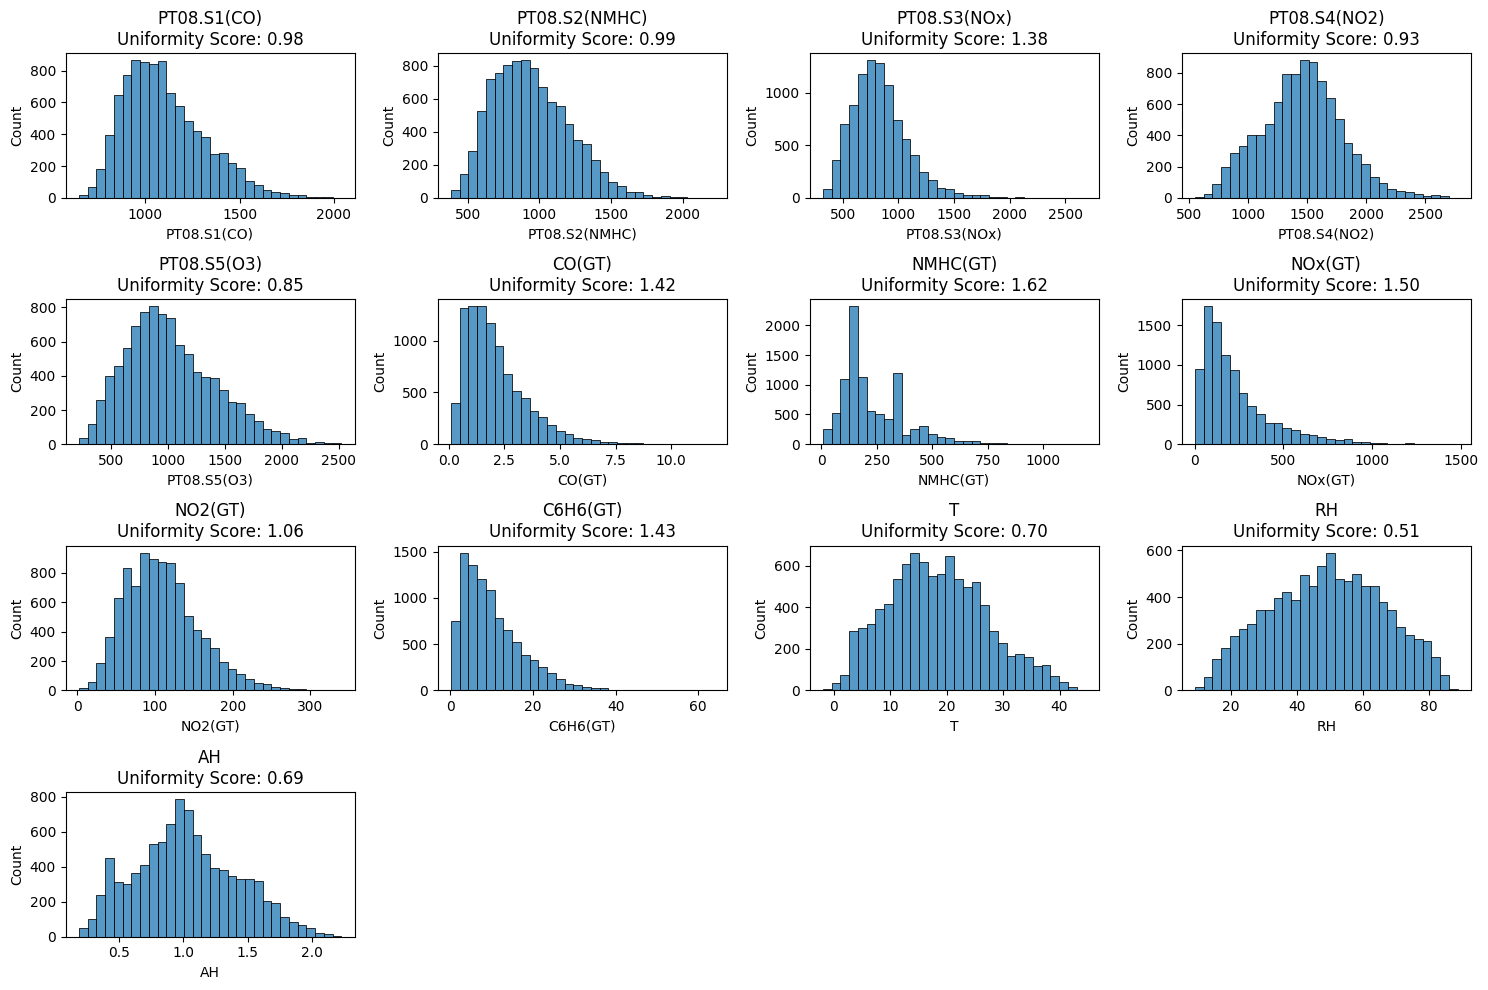

In [152]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(COLUMNS_NUMERICAL, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=30)
    plt.title(f'{col}\nUniformity Score: {distribution_analysis.loc[col, "uniformity_score"]:.2f}')
plt.tight_layout()
plt.show()

Based on the computed uniformity score (std/mean) and the plotted histograms, even if some distributions are skewed (eg.: `'CD(GT)'`, `'NOx(GT)'`, and so on), it can be said that none of these are illogical or uniform.

Moreover, the `'T'` feature has some below 0 values. However, since this the used units are Cº, negative values can be permitted.

## 1.4: Check / redesign / determine the target variable and its quality

In [153]:
def create_binary_target(data, target_column, threshold_method='median'):
    """
    Transform a continuous target variable into binary
    Methods: 'median', 'mean', 'percentile'
    Returns: transformed data and threshold used
    """
    if threshold_method == 'median':
        threshold = data[target_column].median()
    elif threshold_method == 'mean':
        threshold = data[target_column].mean()
    elif threshold_method == 'percentile':
        threshold = data[target_column].quantile(0.75)  # 75th percentile
    
    binary_target = (data[target_column] > threshold).astype(int)
    return binary_target, threshold

def analyze_binary_target(data, binary_target, original_target, threshold):
    """
    Analyze the quality of the binary target variable
    """
    print(f"\nBinary Target Analysis")
    print("-" * 50)
    
    # Class distribution
    class_dist = binary_target.value_counts(normalize=True)
    print("\nClass Distribution:")
    print(class_dist)
    
    # Calculate class balance ratio
    balance_ratio = min(class_dist) / max(class_dist)
    print(f"\nClass Balance Ratio: {balance_ratio:.2f}")
    
    # Visualize class distribution
    plt.figure(figsize=(12, 4))
    
    # Bar plot of class distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=binary_target)
    plt.title('Binary Target Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    # Original variable distribution with threshold
    plt.subplot(1, 2, 2)
    sns.histplot(data[original_target], bins=30)
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
    plt.title(f'Original {original_target} Distribution\nwith Binary Threshold')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'balance_ratio': balance_ratio,
        'class_distribution': class_dist
    }

As can be seen in the following code cell, the following features are chosen as potential targets for the following reasons:

**CO(GT)**: Key indicator of incomplete combustion from vehicles and industry, measured in mg/m³ with ground truth data.

**C6H6(GT)**: Benzene is a hazardous organic compound commonly from vehicle emissions, with accurate reference measurements in μg/m³.

**NO2(GT)**: Critical urban air pollutant directly linked to respiratory issues, measured in μg/m³ by reference analyzer.

**NOx(GT)**: Family of nitrogen oxide gases that form smog and acid rain, measured in ppb as ground truth from traffic and industrial sources.

Binary Target Variable Analysis

Analyzing CO(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
CO(GT)
0    0.50016
1    0.49984
Name: proportion, dtype: float64

Class Balance Ratio: 1.00


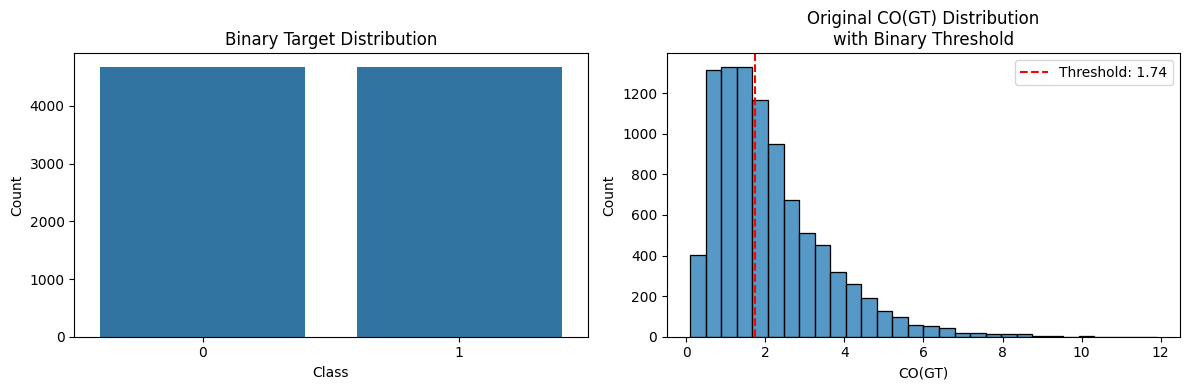


Binary Target Analysis
--------------------------------------------------

Class Distribution:
CO(GT)
0    0.592925
1    0.407075
Name: proportion, dtype: float64

Class Balance Ratio: 0.69


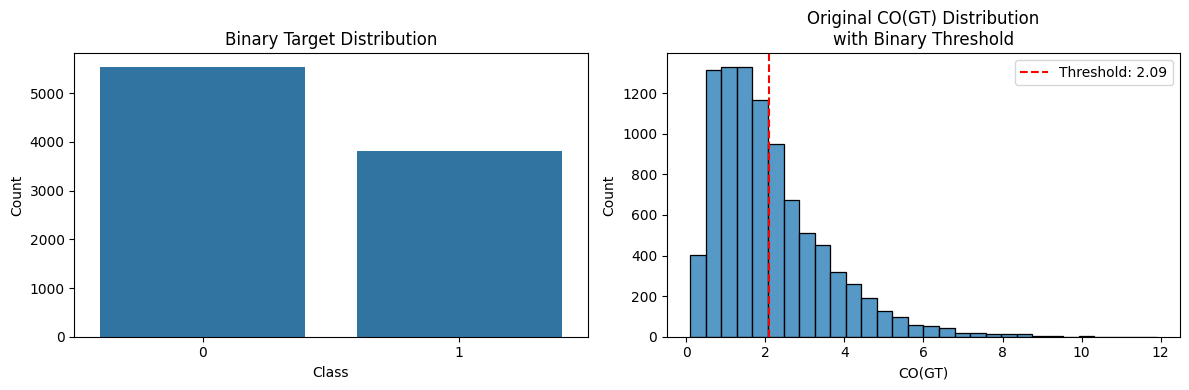


Binary Target Analysis
--------------------------------------------------

Class Distribution:
CO(GT)
0    0.750027
1    0.249973
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


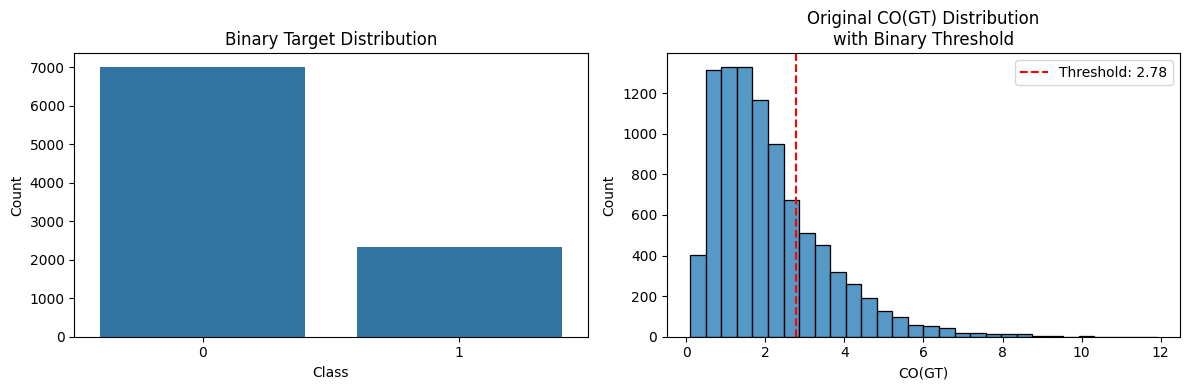


Analyzing C6H6(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
C6H6(GT)
0    0.500053
1    0.499947
Name: proportion, dtype: float64

Class Balance Ratio: 1.00


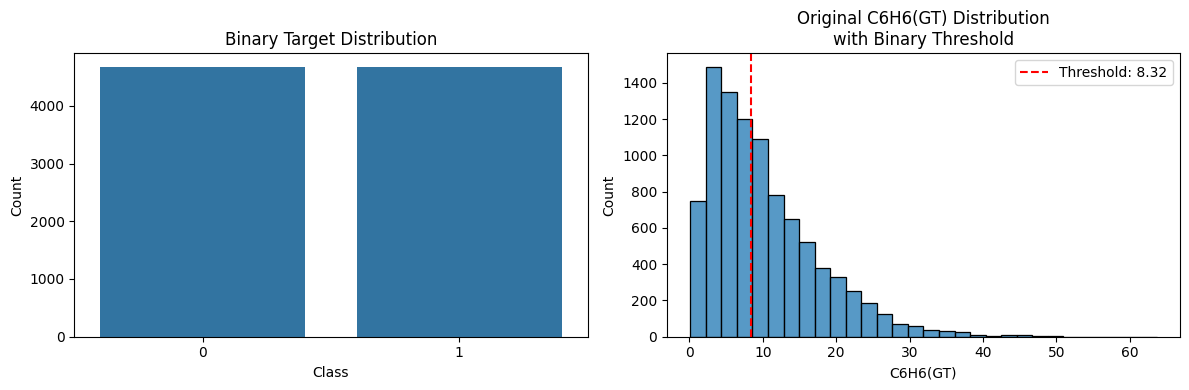


Binary Target Analysis
--------------------------------------------------

Class Distribution:
C6H6(GT)
0    0.601047
1    0.398953
Name: proportion, dtype: float64

Class Balance Ratio: 0.66


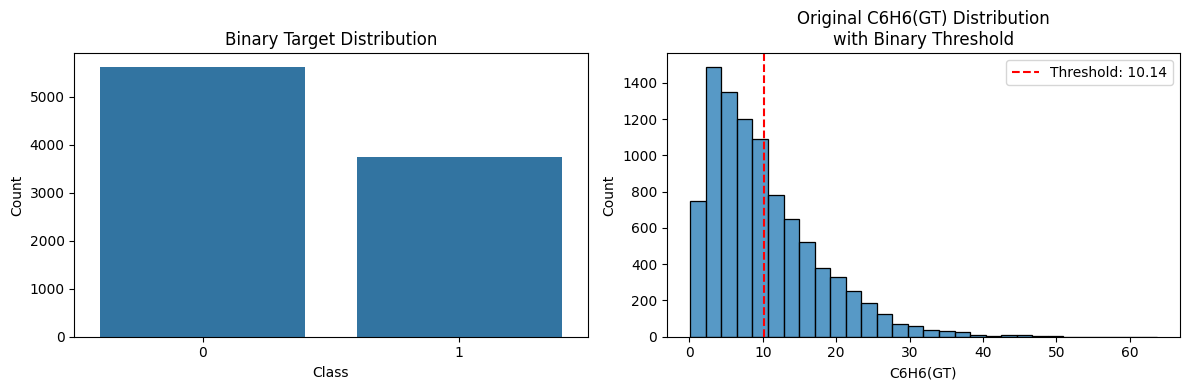


Binary Target Analysis
--------------------------------------------------

Class Distribution:
C6H6(GT)
0    0.751309
1    0.248691
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


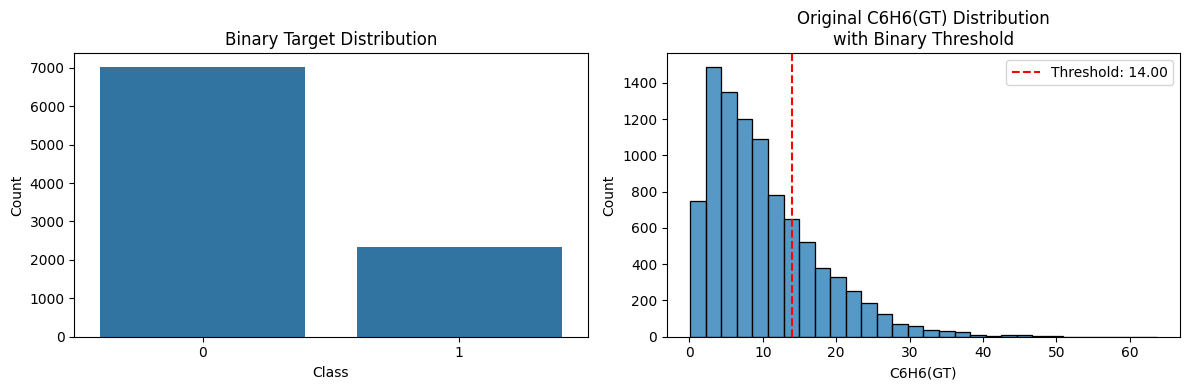


Analyzing NO2(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
NO2(GT)
0    0.502405
1    0.497595
Name: proportion, dtype: float64

Class Balance Ratio: 0.99


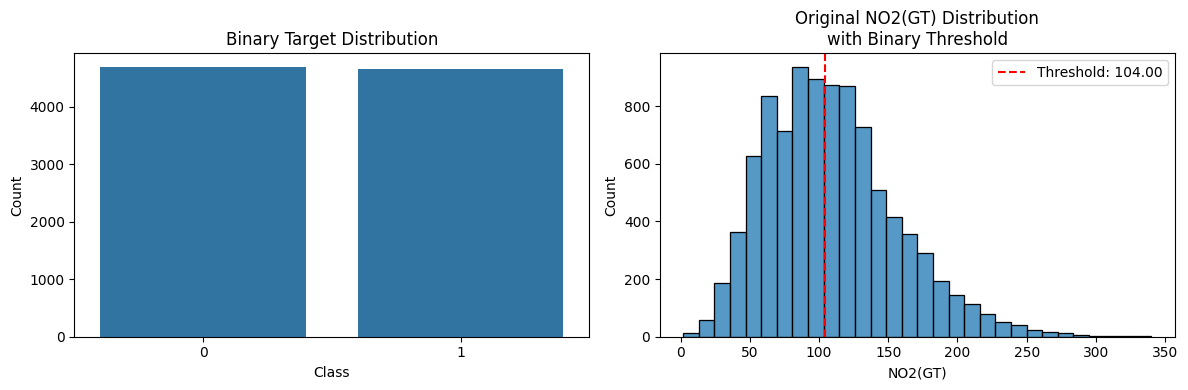


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NO2(GT)
0    0.534466
1    0.465534
Name: proportion, dtype: float64

Class Balance Ratio: 0.87


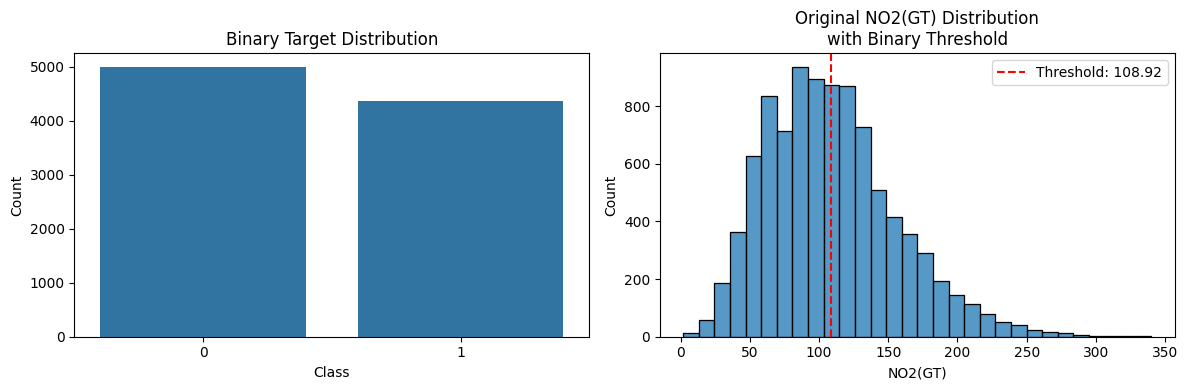


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NO2(GT)
0    0.751416
1    0.248584
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


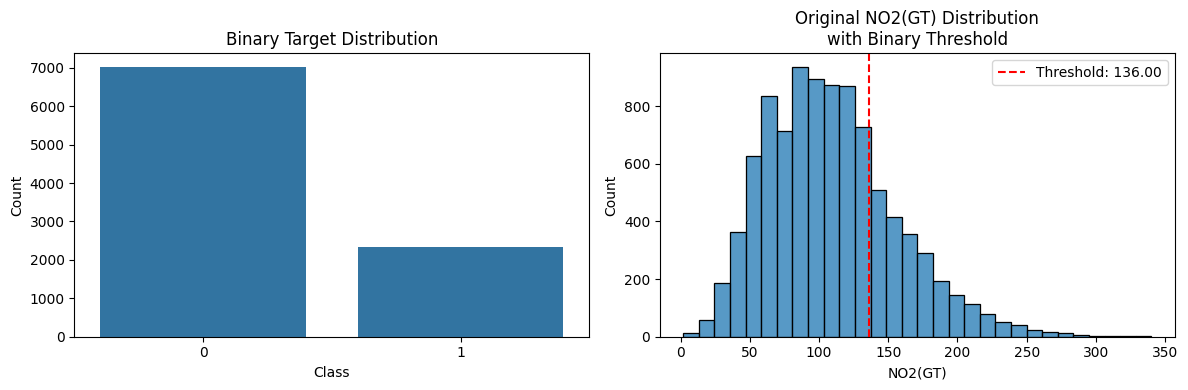


Analyzing NOx(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
NOx(GT)
0    0.500802
1    0.499198
Name: proportion, dtype: float64

Class Balance Ratio: 1.00


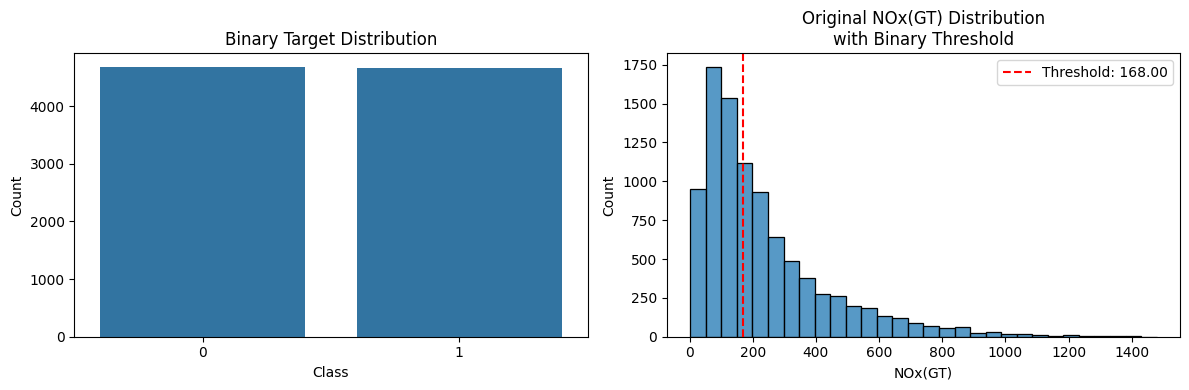


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NOx(GT)
0    0.64262
1    0.35738
Name: proportion, dtype: float64

Class Balance Ratio: 0.56


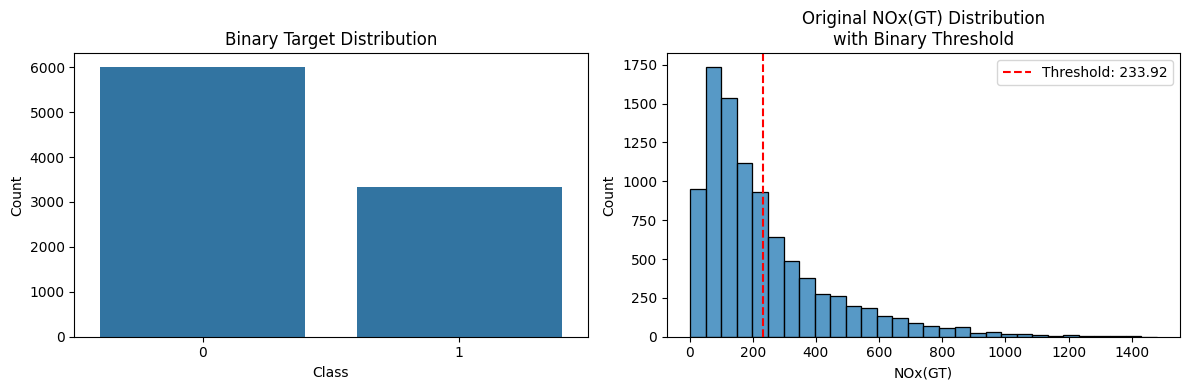


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NOx(GT)
0    0.750134
1    0.249866
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


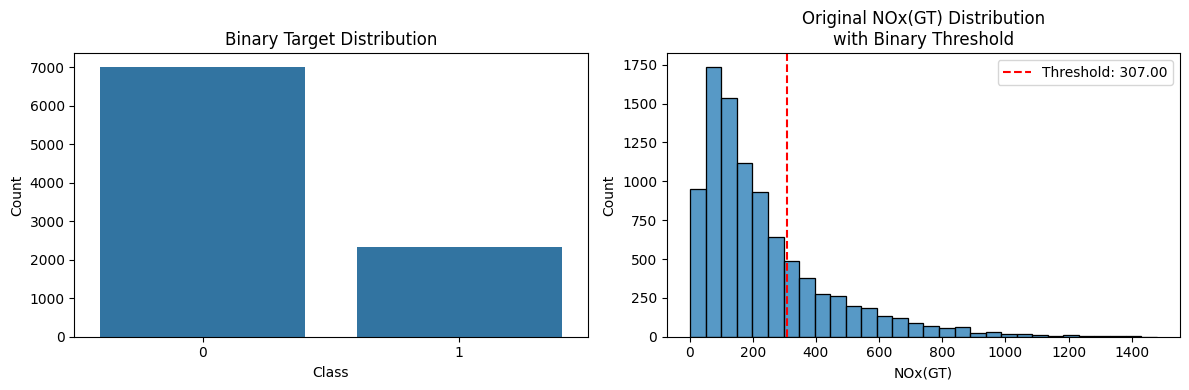

In [154]:
# Analyze potential target variables for binarization
potential_targets = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)']
binary_analyses = {}
threshold_methods = ['median', 'mean', 'percentile']

print("Binary Target Variable Analysis")
print("=" * 50)

for target in potential_targets:
    print(f"\nAnalyzing {target}")
    print("-" * 50)
    
    method_results = {}
    for method in threshold_methods:
        # Create binary target
        binary_target, threshold = create_binary_target(data, target, method)
        
        # Analyze binary target
        analysis_results = analyze_binary_target(data, binary_target, target, threshold)
        method_results[method] = {
            'threshold': threshold,
            'balance_ratio': analysis_results['balance_ratio'],
            'class_distribution': analysis_results['class_distribution']
        }
    
    binary_analyses[target] = method_results

In [155]:
# Compare and select the best target variable and threshold method
results_df = pd.DataFrame(columns=['Target', 'Method', 'Balance_Ratio', 'Threshold'])

for target, methods in binary_analyses.items():
    for method, results in methods.items():
        new_row = pd.DataFrame({
            'Target': [target],
            'Method': [method],
            'Balance_Ratio': [results['balance_ratio']],
            'Threshold': [results['threshold']]
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)

print("\nComparison of Binary Target Options:")
print(results_df.sort_values('Balance_Ratio', ascending=False))

# Select the best combination based on balance ratio
best_combination = results_df.loc[results_df['Balance_Ratio'].idxmax()]
print(f"\nRecommended Binary Target Configuration:")
print(f"Target Variable: {best_combination['Target']}")
print(f"Threshold Method: {best_combination['Method']}")
print(f"Balance Ratio: {best_combination['Balance_Ratio']:.2f}")
print(f"Threshold Value: {best_combination['Threshold']:.2f}")


Comparison of Binary Target Options:
      Target      Method  Balance_Ratio   Threshold
3   C6H6(GT)      median       0.999786    8.320000
0     CO(GT)      median       0.999359    1.740000
9    NOx(GT)      median       0.996799  168.000000
6    NO2(GT)      median       0.990428  104.000000
7    NO2(GT)        mean       0.871026  108.923376
1     CO(GT)        mean       0.686554    2.087111
4   C6H6(GT)        mean       0.663762   10.144287
10   NOx(GT)        mean       0.556128  233.918435
2     CO(GT)  percentile       0.333286    2.780000
11   NOx(GT)  percentile       0.333096  307.000000
5   C6H6(GT)  percentile       0.331010   14.000000
8    NO2(GT)  percentile       0.330821  136.000000

Recommended Binary Target Configuration:
Target Variable: C6H6(GT)
Threshold Method: median
Balance Ratio: 1.00
Threshold Value: 8.32


/tmp/ipykernel_9439/1233042504.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


In [156]:
# Create final binary target variable and drop the feature used to compute this value
binary_target, threshold = create_binary_target(
    data, 
    best_combination['Target'], 
    best_combination['Method']
)
data['target_binary'] = binary_target
data.drop(columns=[best_combination['Target']], inplace=True)
data

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Combined_Date,target_binary
0,2.6,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,1
1,2.0,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,1
2,2.2,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,1
3,2.2,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,1
4,1.6,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,323.2,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,2005-04-04 10:00:00,1
9353,2.4,1163.0,323.2,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,2005-04-04 11:00:00,1
9354,2.4,1142.0,323.2,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,2005-04-04 12:00:00,1
9355,2.1,1003.0,305.2,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,2005-04-04 13:00:00,1


## 1.5: Explain / comment on the findings

In [160]:
print("\nKey Findings from Binary Target Analysis:")
print("-" * 50)
print(f"\n1. Selected Target Variable: {best_combination['Target']}")
print(f"   - Threshold Method: {best_combination['Method']}")
print(f"   - Threshold Value: {best_combination['Threshold']:.2f}")
print(f"   - Class Balance Ratio: {best_combination['Balance_Ratio']:.2f}")

print("\n2. Class Distribution:")
class_counts = data['target_binary'].value_counts()
for class_label, count in class_counts.items():
    print(f"   Class {class_label}: {count} samples ({count/len(data)*100:.1f}%)")

print("\n3. Recommendations:")
if best_combination['Balance_Ratio'] < 0.7:
    print("   - Consider class balancing techniques for modeling")
elif best_combination['Balance_Ratio'] < 0.3:
    print("   - Strong class imbalance detected - may need oversampling/undersampling")
else:
    print("   - No recommendations :)")



Key Findings from Binary Target Analysis:
--------------------------------------------------

1. Selected Target Variable: C6H6(GT)
   - Threshold Method: median
   - Threshold Value: 8.32
   - Class Balance Ratio: 1.00

2. Class Distribution:
   Class 0: 4679 samples (50.0%)
   Class 1: 4678 samples (50.0%)

3. Recommendations:
   - No recommendations :)


Binary Target Variable Analysis

Analyzing CO(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
CO(GT)
0    0.50016
1    0.49984
Name: proportion, dtype: float64

Class Balance Ratio: 1.00


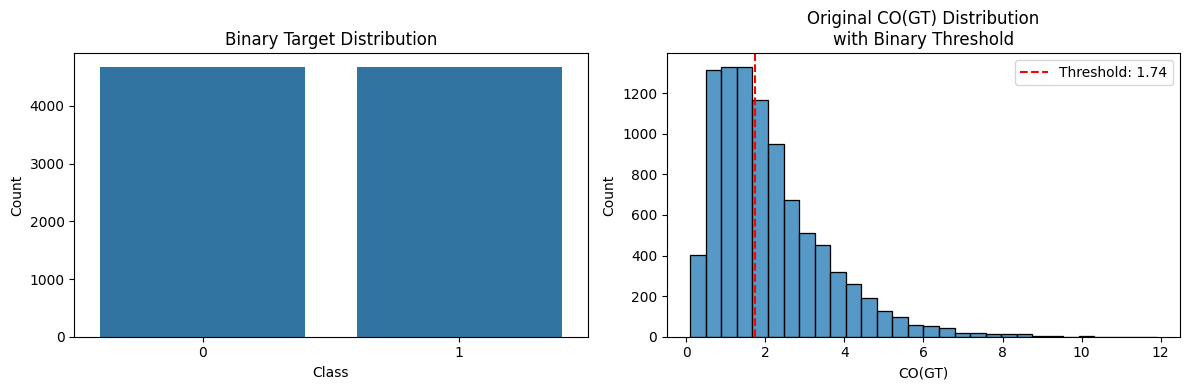


Binary Target Analysis
--------------------------------------------------

Class Distribution:
CO(GT)
0    0.592925
1    0.407075
Name: proportion, dtype: float64

Class Balance Ratio: 0.69


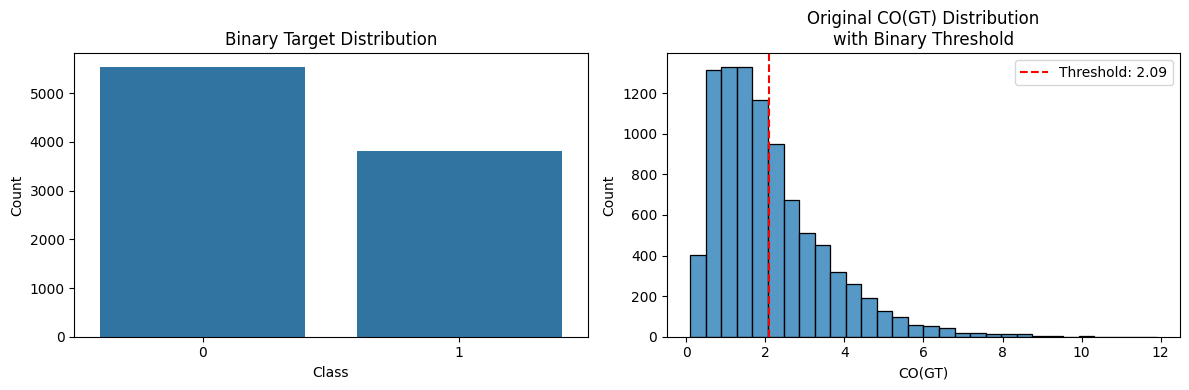


Binary Target Analysis
--------------------------------------------------

Class Distribution:
CO(GT)
0    0.750027
1    0.249973
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


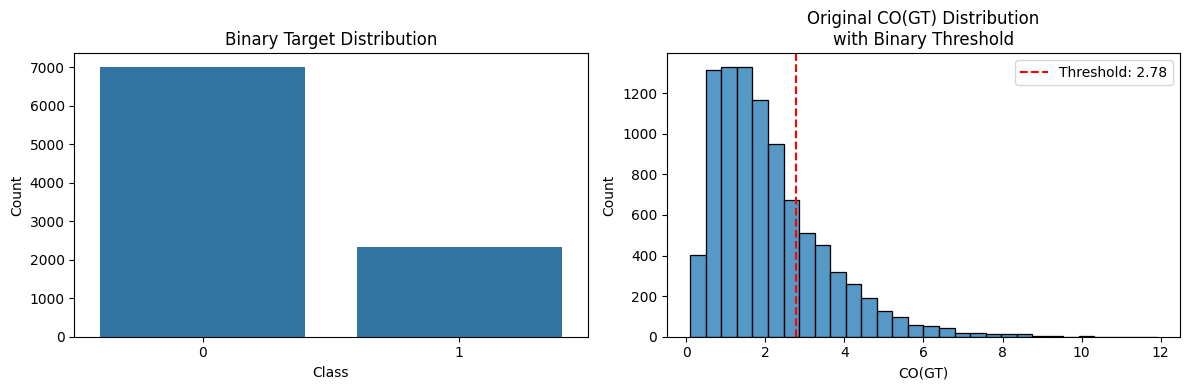


Analyzing NO2(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
NO2(GT)
0    0.502405
1    0.497595
Name: proportion, dtype: float64

Class Balance Ratio: 0.99


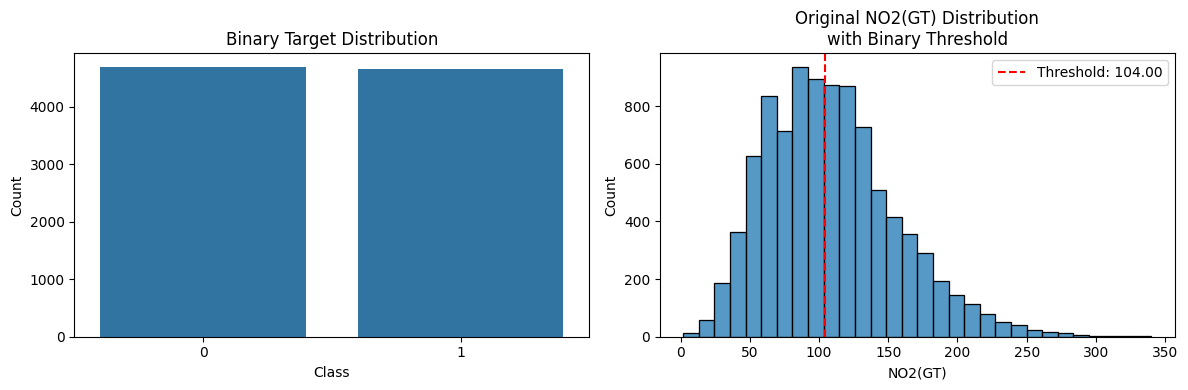


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NO2(GT)
0    0.534466
1    0.465534
Name: proportion, dtype: float64

Class Balance Ratio: 0.87


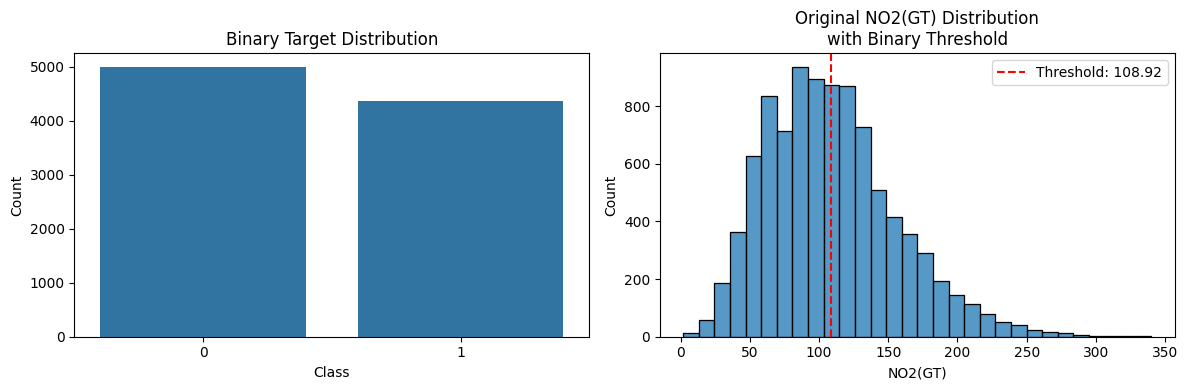


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NO2(GT)
0    0.751416
1    0.248584
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


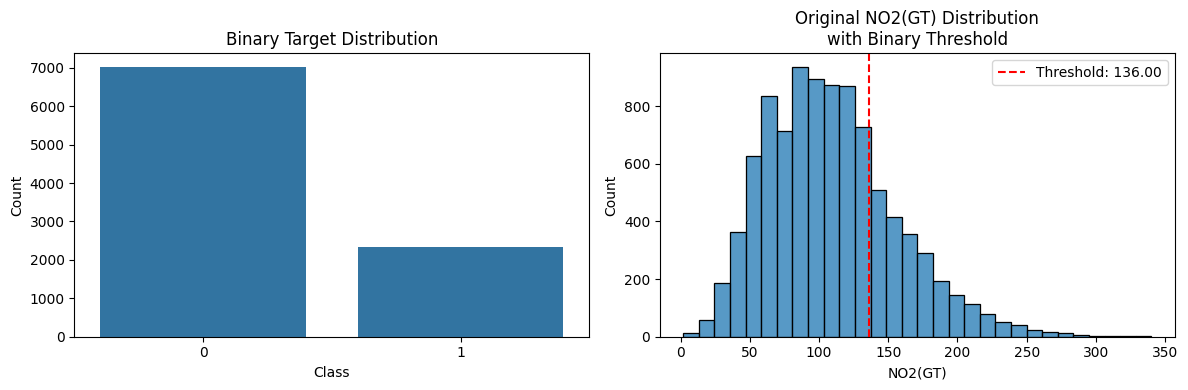


Analyzing NOx(GT)
--------------------------------------------------

Binary Target Analysis
--------------------------------------------------

Class Distribution:
NOx(GT)
0    0.500802
1    0.499198
Name: proportion, dtype: float64

Class Balance Ratio: 1.00


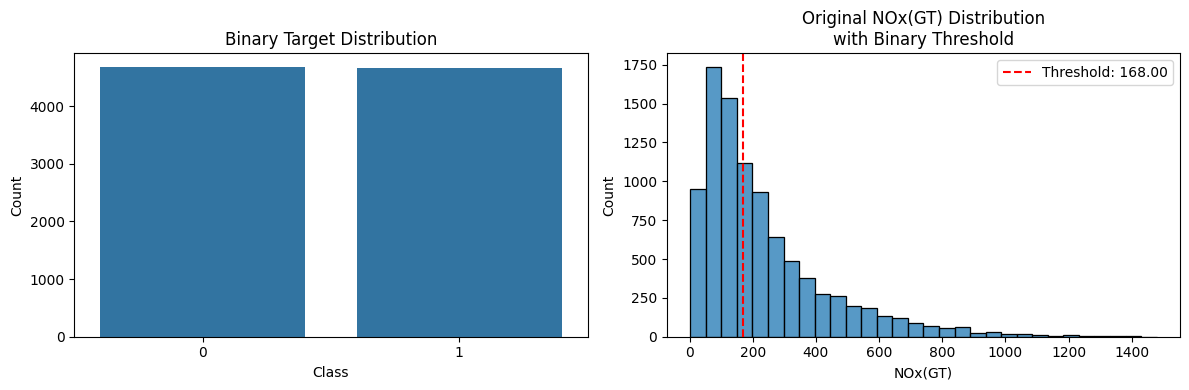


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NOx(GT)
0    0.64262
1    0.35738
Name: proportion, dtype: float64

Class Balance Ratio: 0.56


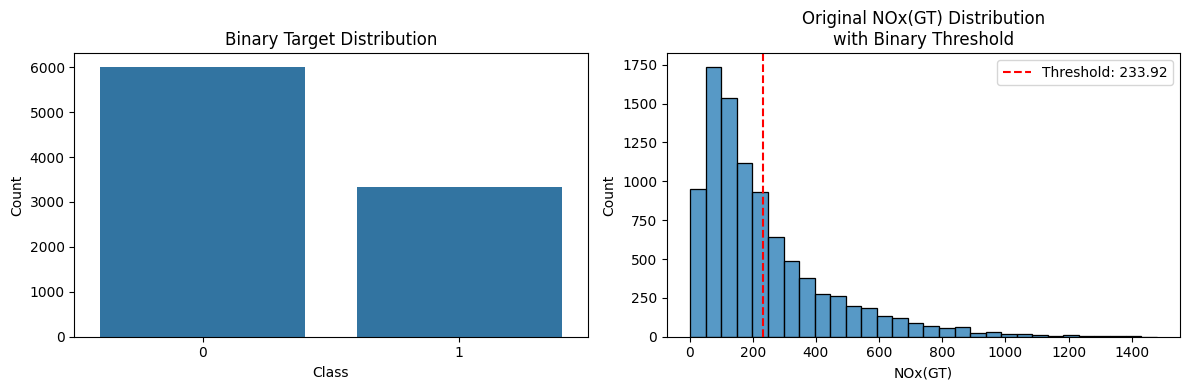


Binary Target Analysis
--------------------------------------------------

Class Distribution:
NOx(GT)
0    0.750134
1    0.249866
Name: proportion, dtype: float64

Class Balance Ratio: 0.33


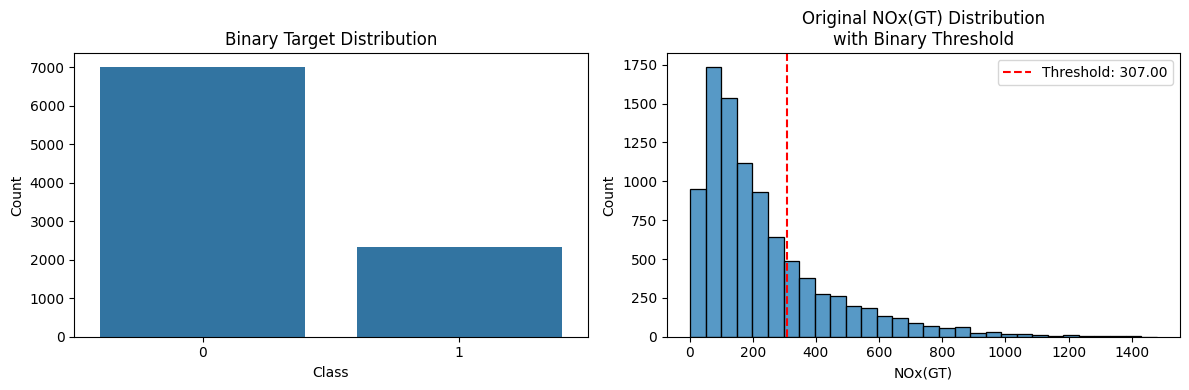

AttributeError: 'DataFrame' object has no attribute 'append'

In [158]:

def analyze_binary_target(data, binary_target, original_target, threshold):
    """
    Analyze the quality of the binary target variable
    """
    print(f"\nBinary Target Analysis")
    print("-" * 50)
    
    # Class distribution
    class_dist = binary_target.value_counts(normalize=True)
    print("\nClass Distribution:")
    print(class_dist)
    
    # Calculate class balance ratio
    balance_ratio = min(class_dist) / max(class_dist)
    print(f"\nClass Balance Ratio: {balance_ratio:.2f}")
    
    # Visualize class distribution
    plt.figure(figsize=(12, 4))
    
    # Bar plot of class distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=binary_target)
    plt.title('Binary Target Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    # Original variable distribution with threshold
    plt.subplot(1, 2, 2)
    sns.histplot(data[original_target], bins=30)
    plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
    plt.title(f'Original {original_target} Distribution\nwith Binary Threshold')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'balance_ratio': balance_ratio,
        'class_distribution': class_dist
    }

# Analyze potential target variables for binarization
potential_targets = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
binary_analyses = {}
threshold_methods = ['median', 'mean', 'percentile']

print("Binary Target Variable Analysis")
print("=" * 50)

for target in potential_targets:
    print(f"\nAnalyzing {target}")
    print("-" * 50)
    
    method_results = {}
    for method in threshold_methods:
        # Create binary target
        binary_target, threshold = create_binary_target(data, target, method)
        
        # Analyze binary target
        analysis_results = analyze_binary_target(data, binary_target, target, threshold)
        method_results[method] = {
            'threshold': threshold,
            'balance_ratio': analysis_results['balance_ratio'],
            'class_distribution': analysis_results['class_distribution']
        }
    
    binary_analyses[target] = method_results

# Compare and select the best target variable and threshold method
results_df = pd.DataFrame(columns=['Target', 'Method', 'Balance_Ratio', 'Threshold'])
for target, methods in binary_analyses.items():
    for method, results in methods.items():
        results_df = results_df.append({
            'Target': target,
            'Method': method,
            'Balance_Ratio': results['balance_ratio'],
            'Threshold': results['threshold']
        }, ignore_index=True)

print("\nComparison of Binary Target Options:")
print(results_df.sort_values('Balance_Ratio', ascending=False))

# Select the best combination based on balance ratio
best_combination = results_df.loc[results_df['Balance_Ratio'].idxmax()]
print(f"\nRecommended Binary Target Configuration:")
print(f"Target Variable: {best_combination['Target']}")
print(f"Threshold Method: {best_combination['Method']}")
print(f"Balance Ratio: {best_combination['Balance_Ratio']:.2f}")
print(f"Threshold Value: {best_combination['Threshold']:.2f}")

# Create final binary target variable
binary_target, threshold = create_binary_target(
    data, 
    best_combination['Target'], 
    best_combination['Method']
)
data['target_binary'] = binary_target

# Analyze feature relationships with binary target
print("\nFeature Analysis with Binary Target:")
for feature in COLUMNS_NUMERICAL:
    if feature != best_combination['Target']:
        correlation = data[feature].corr(data['target_binary'])
        print(f"{feature}: Correlation with binary target = {correlation:.3f}")

# Document findings
print("\nKey Findings from Binary Target Analysis:")
print("-" * 50)
print(f"\n1. Selected Target Variable: {best_combination['Target']}")
print(f"   - Threshold Method: {best_combination['Method']}")
print(f"   - Threshold Value: {best_combination['Threshold']:.2f}")
print(f"   - Class Balance Ratio: {best_combination['Balance_Ratio']:.2f}")

print("\n2. Class Distribution:")
class_counts = data['target_binary'].value_counts()
for class_label, count in class_counts.items():
    print(f"   Class {class_label}: {count} samples ({count/len(data)*100:.1f}%)")

print("\n3. Recommendations:")
if best_combination['Balance_Ratio'] < 0.7:
    print("   - Consider class balancing techniques for modeling")
if best_combination['Balance_Ratio'] < 0.3:
    print("   - Strong class imbalance detected - may need oversampling/undersampling")